# 5 Steps in Pandas to Process Petrophysical Well Logs(part2)

#### Dataset: 1050383876v2.csv.  

En este trabajos se abordan los siguientes pasos: 

   1- Definición de la función de análisis
   2- Aplicación de la función
   3- Función Lambda
   4- Función de corte
   5- Visualización 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Levantamos el dataset en el dataframe pandas

In [2]:
df = pd.read_csv('1050383876v2.csv')
df.head()

DEPT  CNPOR     GR  RHOB     DT  MELCAL  SPOR   Vsh
0  1000.0   4.62  10.82  2.93  51.77    8.26  2.95  0.02
1  1000.5   4.29  11.34  2.94  51.98    8.22  3.10  0.02
2  1001.0   4.14  11.72  2.93  52.10    8.20  3.18  0.02
3  1001.5   4.03  13.02  2.91  52.13    8.20  3.20  0.02
4  1002.0   3.94  12.72  2.88  52.07    8.19  3.16  0.02

### 1- Definición de la Function

#### Cálculo de la porosidad desde el log de densidad del registro de pozo 

Existen varios enfoques para calcular la porosidad a partir de registros petrofísicos de pozos. En el registro de pozo viene una lectura de densidad del medio rocoso. Conocer la densidad del fluido que llena la porosidad de la roca y la densidad granular puede ayudarnos a calcular el porcentaje de áreas vacías de las rocas. 

In [5]:
def den(rb, rf, rm):
    # rb = densidad estimada a partir de las lecturas del registro del pozo
    # rf = densidad del fluido
    # rm = matriz de densidad rocosa 
    return (rm-rb)*100/(rm-rf)

### 2- Aplicación de la función 

Utilizando la función apply, se puede aplicar una función predefinida (en este caso, la porosidad de la densidad) a cada uno de los elementos del DataFrame, ya sea en dirección de columna o de fila.

In [6]:
df["DNPOR"]=df['RHOB'].apply(den, rf=1, rm=2.71 )
df.head()

DEPT  CNPOR     GR  RHOB     DT  MELCAL  SPOR   Vsh      DNPOR
0  1000.0   4.62  10.82  2.93  51.77    8.26  2.95  0.02 -12.865497
1  1000.5   4.29  11.34  2.94  51.98    8.22  3.10  0.02 -13.450292
2  1001.0   4.14  11.72  2.93  52.10    8.20  3.18  0.02 -12.865497
3  1001.5   4.03  13.02  2.91  52.13    8.20  3.20  0.02 -11.695906
4  1002.0   3.94  12.72  2.88  52.07    8.19  3.16  0.02  -9.941520

Como la función den toma 3 valores (rb, rf, rm), podemos introducir la columna principal o índice del conjunto de datos (rb =df['RHOB']) y utilizar la función apply para definir las constantes rf y rm como entradas manuales. Aquí por sugerencia bibliográfica asumimos que el contenido de fluido es agua es de densidad 1 y el mineral dominante es Calcita con una densidad de 2.71. La porosidad de la densidad se almacena en una nueva columna llamada DNPOR.

### 3- Función Lambda

La función lambda es una función simple de 1 línea que no tiene palabras clave def o return. De hecho, están implícitas. Para utilizar esta función, tenemos que escribir lambda seguido de los parámetros. Luego, los dos puntos van antes del argumento return.

#### Cálculo de la porosidad total a partir de la densidad y la porosidad de neutrones 

In [9]:
Tot_por = lambda DN,CN: (DN+CN)/2

La porosidad total es la media de la densidad y la porosidad medida con el registro denominado "netrónico"

El nombre de la función es Tot_por. Para la función lambda, DN y CN son los parámetros de densidad y neutrones seguidos de dos puntos. La media de estas dos entradas será devuelta por la función.

In [29]:
df['TPOR'] = Tot_por(df['CNPOR'], df["DNPOR"])
df.head()

DEPT  CNPOR     GR  RHOB     DT  MELCAL  SPOR   Vsh      DNPOR      TPOR
0  1000.0   4.62  10.82  2.93  51.77    8.26  2.95  0.02 -13.529412 -4.454706
1  1000.5   4.29  11.34  2.94  51.98    8.22  3.10  0.02 -14.117647 -4.913824
2  1001.0   4.14  11.72  2.93  52.10    8.20  3.18  0.02 -13.529412 -4.694706
3  1001.5   4.03  13.02  2.91  52.13    8.20  3.20  0.02 -12.352941 -4.161471
4  1002.0   3.94  12.72  2.88  52.07    8.19  3.16  0.02 -10.588235 -3.324118

Llamando a la función Tot_por e introduciendo las columnas correspondientes de DataFrame como entrada se creará la porosidad total que se almacenará en una nueva columna llamada TPOR en el conjunto de datos.

### 4- Función Cut 

Cuando necesitemos segmentar y ordenar los valores de los datos en agrupamientos específicos, podemos utilizar la función Cut. Vamos a utilizar esta función para definir facies (conjunto de rocas sedimentarias) simples basadas en propiedades petrofísicas.

#### categorización de Facies 

In [74]:
df['facies_gr'] = pd.cut(df['GR'], bins=[0,40,300], labels=['clean', 'shaly'] )

La clasificación de las "facies" es un tema muy amplio en geociencias y pueden entrar en juego varias métricas, pero acá lo veremos de forma muy simple. Basándonos en las lecturas de GR en los registros de pozos, podemos identificar las formaciones limpias de las limosas (es decir más porosas o arcillosas). Se añade una nueva columna al conjunto de datos basada en las lecturas de GR, que se clasifican entre 0 y 40 (limpias), y entre 40 y 300 (arcillosas).

### 5- Visualización

La biblioteca matplotlib es común en python para usos de vizualización sin embargo, preferimos utilizar la biblioteca Seaborn por su simplicidad. Deseamos visualizar un gráfico de dispersión de la porosidad de densidad frente a la porosidad de neutrones con el color de la leyenda de facies que definimos en el punto anterior. Esto es simplemente accesible por una línea de código, mientras que en matplotlib requiere un bucle for.


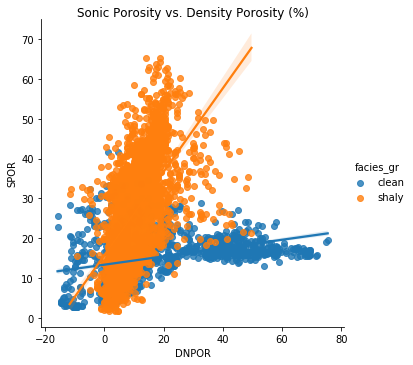

In [115]:
ab = sns.lmplot(x='DNPOR', y='SPOR', hue='facies_gr', data=df)
plt.title('Sonic Porosity vs. Density Porosity', pad=-10)
plt.savefig(fname='ABD.png',dpi = 300)